# Analyse stochastic simulations of feedback controls

# Controls A, B, C, F, G, X, Y, Z

Author: Juvid Aryaman

In [1]:
import mitonetworks.det as mtd
import mitonetworks.stoch as mts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

In [2]:
warnings.simplefilter("ignore", UserWarning) # when generating svg's get lots of useless UserWarnings, so suppress them

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
mts.reset_plots()
fontsize = 30
font = {'size' : fontsize}
plt.rcParams.update({'axes.labelsize': fontsize})

In [5]:
ctrl_dirs = ['A_relaxed_rep',
'B_diff_ctrl',
'C_Ratiometric_control_target',
'F_Production_indep_wt',
'G_Ratiometric_deg',
'Y_linear_feedback_deg',
'Z_diff_deg',
'X_gen_linear_feedback_ctrl']

In [6]:
do_all = False # make an extended set of analysis figures

In [7]:
force_remake_gradients = True

A_relaxed_rep
B_diff_ctrl
C_Ratiometric_control_target
F_Production_indep_wt
G_Ratiometric_deg
Y_linear_feedback_deg
Z_diff_deg
X_gen_linear_feedback_ctrl


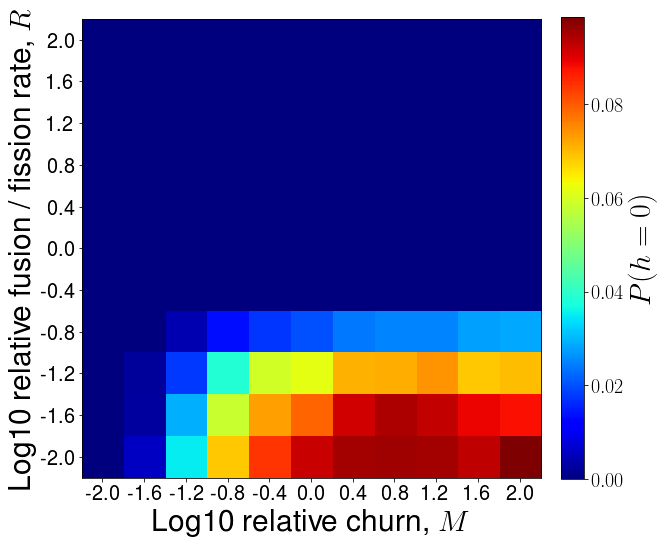

In [8]:
for ctrl_dir in ctrl_dirs:
    print(ctrl_dir)
    if ctrl_dir in ['A_relaxed_rep','X_gen_linear_feedback_ctrl']:
        istransposed = True # a workaround for not having used my class structure in making this data
    else:
        istransposed = False
        
    if ctrl_dir in ['Y_linear_feedback_deg','Z_diff_deg','G_Ratiometric_deg']: # control is in degradation rate
        ansatz_is_ajhg = True
    else:
        ansatz_is_ajhg = False # control is in replication rate
    analysis = mts.AnalyseDataFeedbackControl(dir_df_params = '../{}/param_sweep_vals.csv'.format(ctrl_dir),
        dir_data = '../{}/Data/'.format(ctrl_dir), ctrl_name = ctrl_dir,  istransposed=istransposed, 
        out_dir='./{}'.format(ctrl_dir), ansatz_is_ajhg = ansatz_is_ajhg, plotextensions=['png']
    )
    
    if force_remake_gradients:
        analysis.make_gradients()
        analysis.compute_errors()
    else:
        try:
            analysis.compute_errors()
        except IOError:        
            analysis.make_gradients()
            analysis.compute_errors()
    
    analysis.plotextensions = ['svg']
    analysis.make_summary_matrices(t_eval=500.0);
    if ansatz_is_ajhg:
        analysis.make_heatmap(matrix=analysis.error_ansatz_beta_gamma, vmin=np.log10(0.05), 
                          zlabel='Log10 relative error AJHG', figname='ansatz_err_net_sweep');
    else:
        analysis.make_heatmap(matrix=analysis.error_ansatz_beta_gamma, vmin=np.log10(0.05), 
                          zlabel='Log10 relative error ansatz', figname='ansatz_err_net_sweep');
    if ctrl_dir in ['F_Production_indep_wt','G_Ratiometric_deg','X_gen_linear_feedback_ctrl']:
            analysis.make_heatmap(1.-analysis.p_h_fix_0_array, zlabel="$P(h=0)$", figname='prob_fx_0'); 
    analysis.plotextensions = ['png'] 

    
    if do_all: 
        analysis.make_summary_matrices(t_eval=500.0);
        analysis.make_heatmap(np.log10(analysis.vn_array), zlabel=r"$\log_{10}(\mathbb{V}(n))$", figname='var_n');
        
        
            
        analysis.make_heatmap(1.-analysis.p_h_fix_1_array, zlabel="$P(h=1)$", figname='prob_fx_1', vmin=-0.001);
        analysis.make_heatmap(analysis.mfs_array, zlabel="$\mathbb{E}(f_s)$", figname='mean_fs');
        analysis.make_heatmap(analysis.vh_array, zlabel="$\mathbb{V}(h)'$", figname='het_grad');
        analysis.make_heatmap(analysis.count_array, zlabel="Counts");
        analysis.make_heatmap(analysis.mn_array, zlabel="$\mathbb{E}(n)$", figname='copy_number');
        analysis.make_heatmap(analysis.eh_array, zlabel="$\mathbb{E}(h)$", figname='mean_h');
        
        
        min_idx, max_idx = analysis.df_params[~np.isnan(analysis.df_params['ws_init'])].index[[0,-1]]        
        analysis.plot_h_n_t(min_idx, figname='traj');
        analysis.plot_h_n_t(max_idx,figname='traj');

    